## Assignment 02



In [361]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
from sve_hybrid import run_modelFVM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Q1: Resonance 

### Set up

Run the code below.  Be sure to _update_ `sve_hybrid.py` as I made changes to make the boudnary condition work here. 

The setup of this model is that we are in a 5-m deep channel (1 m wide, though the problem is 1-D) that is 8 km long (20 m * 400 grid cells).  The far right end of the channel is blocked, so water can't flow out of that end.   On the left side of the domain is a 2-km long channel that is 300-m deep, meant to represent an ocean.  The ocean has a "sponge" in it that absorbs waves from the shallow channel and forces the sea level to go up and down with an amplitude of 1 cm with a period $T = \lambda / \sqrt{g*D}$, where $\lambda$ is a wavelength that has been set to 12.21 km, and hence $T =  1743 \ \mathrm{s}$. 

Run the simulation, and keep in mind I'll ask you below to change the period to look for resonance.  


In [396]:
g = 9.81
depth = 5   # m
reservoir = 300
reservoirL = 100

amp = 0.01

nTimes = 85_000
saveT = 100
dt = 0.6
time0 = np.arange(0, dt*nTimes+1, dt)
time = np.arange(0, dt*nTimes+1, saveT*dt)

dx = 20   # m 
nx = 500 

x = np.arange(0, dx*nx, dx)
wavelength =  (x[-1] - x[reservoirL]) * 1.53
print(wavelength)
period = wavelength / np.sqrt(g* depth)
print(f'wavelength {wavelength} m, period {period} s')

# width:
b = np.ones(nx)  # width in m.

# Bottom
zb = np.zeros(nx)
# main channel is 295 m above the bottom of the deep channel.
zb[100:] = reservoir - depth

# initial height
A = (reservoir - zb) * b

drylim=1e-3

Aup = reservoir + amp * np.sin(np.pi * 2 * time0 / period) # * np.minimum(time0/4.2/period, 1.0)

Q = np.zeros(nx) + 0 * A # Flow rate m^3/s
#Q = np.zeros(nx) + Qup # Flow rate m^3/s

Q[(A/b)<drylim] = 0.0
A[(A/b)<drylim]= drylim * b[(A/b)<drylim]

saveA, saveQ = run_modelFVM(nTimes, saveT, dt, dx, zb, b, A, Q, Aup=Aup, Manning=0*x,
                            K4=1e-5, boundary=np.sqrt(g*5))
sealevel = saveA+zb-reservoir
u = saveQ / saveA
x = x-x[100]

12209.4
wavelength 12209.4 m, period 1743.3107825065701 s


Running model: 100%|██████████| 85000/85000 [00:12<00:00, 6895.75it/s]


### Q1.1

Plot the Hovmoller diagrams of the `sealevel` height and `u`.  Describe the response both at early times and later in the simulation.  Does it reach a quasi-steady state?  Be sure to describe the spatial and temporal structure of the steady state, and to compare and contrast the behaviour of the sealevel and velocity.  

Hint: I found it useful to zoom in to an early and late time period to see what is going on.  Sometimes a line plot helps.  Be sure to indicate where the shallow water begins in x (I uses `ax.axvline(x[100]))`

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/309807400.py:4: SyntaxWarning: invalid escape sequence '\e'
  fig.colorbar(pc0, label='$\eta$ [m]')


Text(0.5, 0, 'x [m]')

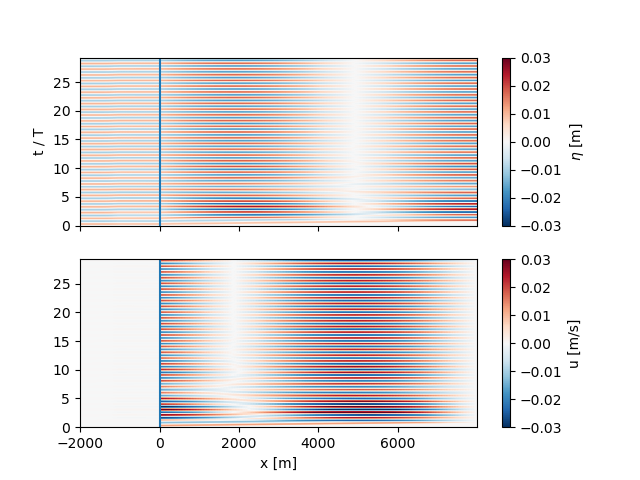

In [445]:
x = x-x[100]
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
pc0 = axs[0].pcolormesh(x, time / period, sealevel, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
fig.colorbar(pc0, label='$\eta$ [m]')
pc1 = axs[1].pcolormesh(x, time / period, u, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
fig.colorbar(pc1, label='u [m/s]')
axs[0].axvline(x[100])
axs[1].axvline(x[100])
# axs.set_ylim(1000, 3500)
axs[0].set_ylabel('t / T')
axs[1].set_xlabel('x [m]')



<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/510181191.py:4: SyntaxWarning: invalid escape sequence '\e'
  fig.colorbar(pc0, label='$\eta$ [m]')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/510181191.py:1: RuntimeWarning: invalid value encountered in divide
  u = saveQ / saveA


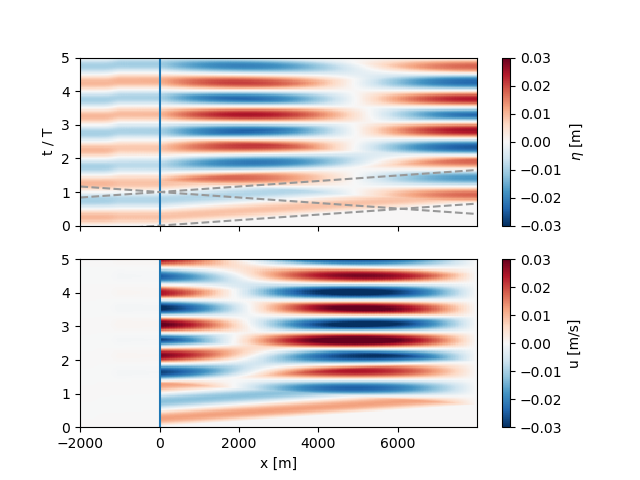

In [446]:
u = saveQ / saveA
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
pc0 = axs[0].pcolormesh(x, time / period, sealevel, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
fig.colorbar(pc0, label='$\eta$ [m]')
pc1 = axs[1].pcolormesh(x, time / period, u, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
fig.colorbar(pc1, label='u [m/s]')
axs[0].axvline(x[100])
axs[1].axvline(x[100])
# axs.set_ylim(1000, 3500)
axs[0].set_ylabel('t / T')
axs[1].set_xlabel('x [m]')
axs[0].set_ylim(0, 5)
axs[0].plot(x, (x-x[100]) / np.sqrt(g*5) / period, '--', color='0.6')
axs[0].plot(x, (x-x[100]) / np.sqrt(g*5) / period + 1.0, '--', color='0.6')
axs[0].plot(x, -(x-x[100]) / np.sqrt(g*5) / period + 1.0, '--', color='0.6')


Early in the simulation, the signal propgates from the deep water to shallow water as a wave.  The dashed lines show the speed of the wave closely follows the expected wave speed.  

Relatively soon, the response settles down, such that after five or so periods the shallow channel is almost in steady state.  

/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/2165776880.py:1: RuntimeWarning: invalid value encountered in divide
  u = saveQ / saveA


(25.0, 29.0)

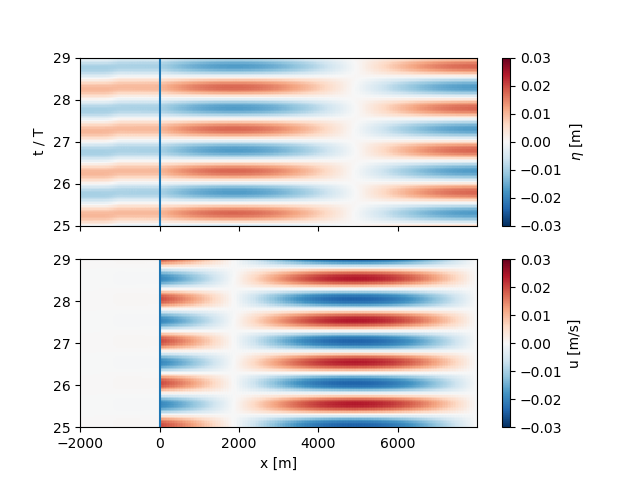

In [447]:
u = saveQ / saveA
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
pc0 = axs[0].pcolormesh(x, time / period, sealevel, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
fig.colorbar(pc0, label=r'$\eta$ [m]')
pc1 = axs[1].pcolormesh(x, time / period, u, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
fig.colorbar(pc1, label='u [m/s]')
axs[0].axvline(x[100])
axs[1].axvline(x[100])
# axs.set_ylim(1000, 3500)
axs[0].set_ylabel('t / T')
axs[1].set_xlabel('x [m]')

axs[0].set_ylim(25, 29)


After 25 periods, the inlet definitely seems to be in steady state. The whole inlet rises and falls either completely in-phase or 180 degrees out of phase, with a null at approximately 6.96 km.  The velocity does the same thing, but is out of phase with the surface forcing by 90 degrees in space and 90 degrees in time.  

### Q1.2 Derive the quasi-steady response:

Using the wave equation, derive an expression for $\eta(x, t)$ and $u(x, t)$ in the shallow channel, with the boundary condition $\eta(x=2000, t) = \eta_0 sin(2 \pi t / T)$ in terms of $g$ and $D$ the water depth in the shallow channel.  Note you need a second boundary condition at the other end of the channel (what is it?).

(Hint: think about the fact that there is a wave travelling into the channel, and one travelling out of the channel.  I did this with complex exponentials and then fount the real part of the solution, but you can solve other ways)

The wave equation allows two waves in this channel, one propagating to the right and one proagating to the left, both with speed $c=\sqrt{gD}$:

$$\eta = \mathcal{R}\left(A e^{i\left(kx + \omega t\right)} + B e^{i\left(-kx + \omega t\right)}\right) $$

where $\omega = \frac{2\pi}{T}$ and $k = \omega \sqrt{gD}$. (Note that we wrote this so that $\omega t$ term is positive, but we could have written as in class: $ B e^{i\left(-kx + \omega t\right)} = B^*e^{i\left(kx - \omega t\right)}$, where $B^*$ is the conjugate of $B$).

If we take $x=0$ at the ocean boundary, the first boundary condition says that 

$$Ae^{-i\omega t} + Be^{-i\omega t} = i\eta_0 e^{-i\omega t}$$ 

$$ A+B = i \eta_0 $$

The other boundary condition is that there can be no flow at $x=8000 m$.  From the x-momentum equation, $\partial u / \partial t = -g \partial \eta / \partial x$ says that the $\partial \eta / \partial x = 0$ at that location, which we will call $x=L$:

$$0 =  iAke^{+i\left(kL-\omega t\right)} -ikB e^{-i\left(kL-\omega t \right)}$$

or 

$$ A = B e^{-2ikL}$$

Solving for B we get

$$ B = i\eta_0 \frac{e^{ikL}}{e^{ikL}+e^{-iklL}} $$

or:

$$ B = i \eta_0 \frac{e^{ikL}}{2 \cos{kL}} $$

and solving for $A$:

$$ A = i \eta_0 \frac{e^{-ikL}}{2 \cos{kL}} $$

This gives us our complex solution for $\eta$ everywhere:

$$\eta = \frac{i\eta_0}{2\cos{kL}} \left[ e^{i\left(k (x-L) + \omega t\right)} +  e^{i\left(-k (x-L) + \omega t\right)} \right]$$

which can be simplified to 

$$\eta = \frac{\eta_0}{\cos{kL}} \sin{\omega t} \cos{\left(k\left(x-L\right)\right)}$$

Note that this solution is a cosine starting at $x=L$, and that everything is all in phase throughout the inlet.  



### Q1.3 Compare solution to the simulation

Compare the analytical solution to the simulation and see how it did.

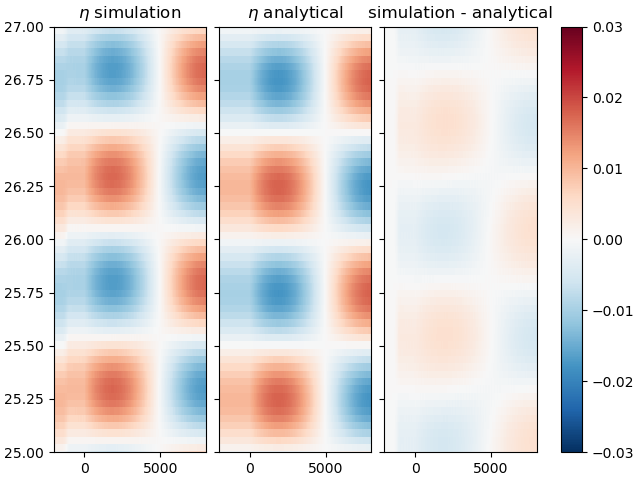

In [452]:
X, T = np.meshgrid(x, time)
# note that the analytical solution was for x=0 at the mouth of the shallow channel:
#X = X-2000
L = 8000

omega = np.pi * 2 / period
k = omega / np.sqrt(g*5) 

# calculate the analytical
analytical = amp / np.cos(k*L) * np.sin(omega*T) * np.cos(k*(X-L))
# make the analytical the same in the deep water
analytical[:, :100] = analytical[:, 100][:, np.newaxis]

# plot
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, layout='constrained')
pc = axs[0].pcolormesh(x, time / period, sealevel, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
axs[0].set_title(r'$\eta$ simulation')
axs[1].pcolormesh(x, time / period, analytical, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
axs[1].set_title(r'$\eta$ analytical')
axs[2].pcolormesh(x, time/ period, sealevel-analytical, vmin=-0.03, vmax=0.03, cmap='RdBu_r')
axs[2].set_ylim(25, 27)
axs[2].set_title('simulation - analytical')
fig.colorbar(pc, ax=axs)

We see that the analytical and simulation responses are almost identical, except that the simulation lags the analytical response by a little bit of time, leading to a slight mismatch if we subtract the two responses.  We can see this with a line plot at x=3000:

[Text(0, 0.5, '$\\eta$ [m]'), Text(0.5, 0, 't / T')]

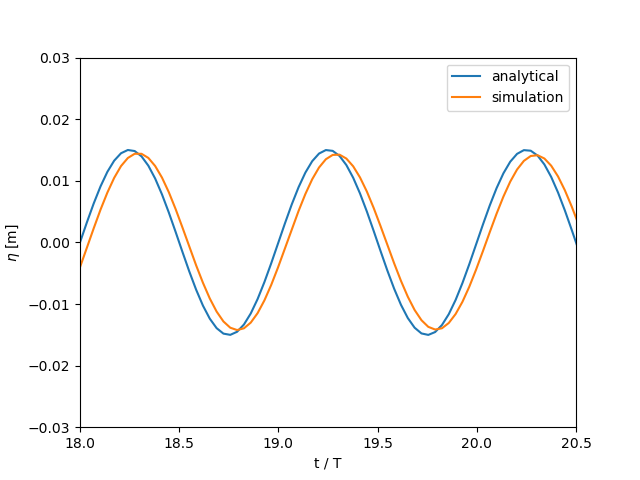

In [458]:
fig, ax = plt.subplots()
ax.plot(time/period, analytical[:, 250], label='analytical')
ax.plot(time/period, sealevel[:, 250], label='simulation')
ax.set_ylim(-0.03, 0.03)
ax.set_xlim(18, 20.5)
ax.legend()
ax.set(ylabel=r'$\eta$ [m]', xlabel='t / T')

Here we can clearly see that the response is also a bit smaller in the simulation, and occurs a bit after the theory.  Both are likely due to imperfections in how the forcing is made in the "ocean", and alos perhaps due to friction in the channel.  However, the solution largely matches the simulation.  

### Q1.4 Plot the response as a function of period

If you change the period of the forcing, you also change the wavenumber $k$.  Plot the amplitude of the sea level height at the head of the inlet ($x=L$) as a function of the period and comment the reason for the result.

Also plot the amplitude of the velocity at $x=0$ for the different forcings.

Note, it is often nice to plot and discuss this result versus $L / c / T$ (what is $L / c$?), and also in space as  $L/\lambda$ instead of just period ($T$).  



First, note that 

$$\frac{\partial u}{\partial t} = -g \frac{\partial \eta}{\partial x}$$

$$\frac{\partial u}{\partial t} = \eta_0 g k \tan{kL} \sin{\omega t}$$

so 

$$ u = \eta_0 g \frac{k}{\omega} \tan{kL} \cos{\omega t}$$


<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\l'
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/271565061.py:9: SyntaxWarning: invalid escape sequence '\e'
  ax.set(xlabel='(L / c) / T', ylabel='$\eta/\eta_0$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/271565061.py:16: SyntaxWarning: invalid escape sequence '\l'
  ax.set(xlabel='$L/\lambda$', ylabel='$\eta/\eta_0$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/271565061.py:16: SyntaxWarning: invalid escape sequence '\e'
  ax.set(xlabel='$L/\lambda$', ylabel='$\eta/\eta_0$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipy

[Text(0.5, 0, '$L/\\lambda$'), Text(0, 0.5, '$u/u_0$')]

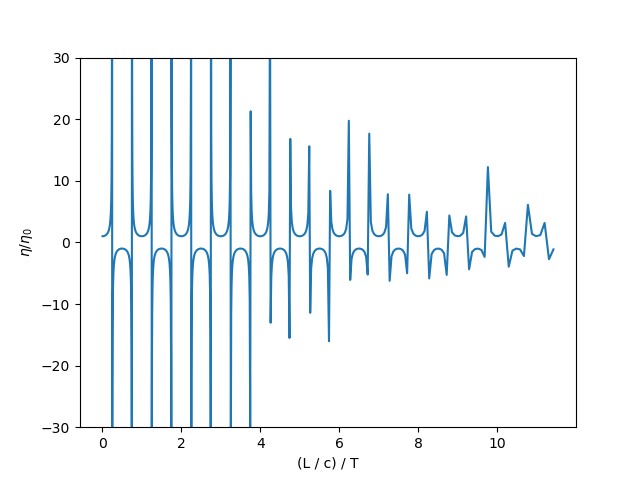

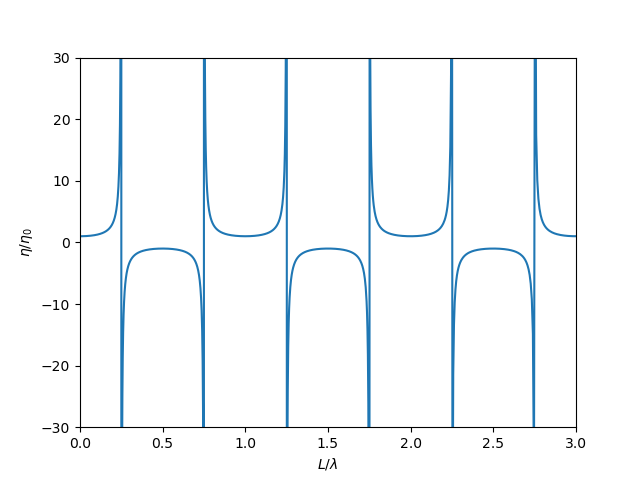

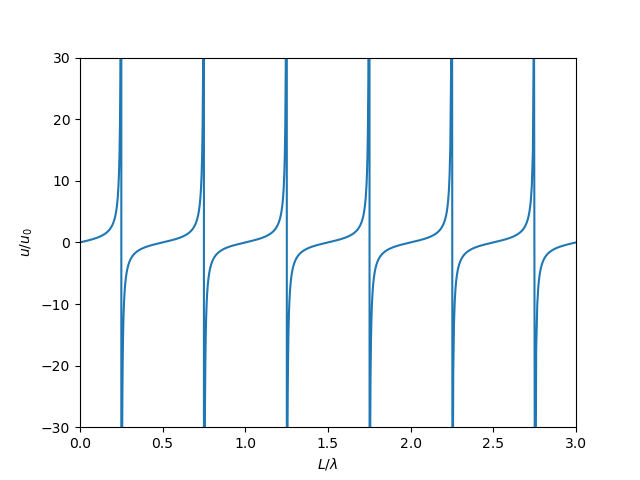

In [516]:
periods = np.arange(100, 100*period, 1)
k = 2 * np.pi / periods / np.sqrt(g*5)

fig, ax = plt.subplots()
ax.plot(1/(periods / 8000 * np.sqrt(g*5)), 1./np.cos(k*L))
ax.set_ylim([-30, 30])
#ax.set_xlim([0, 1/4])
#ax.set_xscale('log')
ax.set(xlabel='(L / c) / T', ylabel='$\eta/\eta_0$')

fig, ax = plt.subplots()
ax.plot(k*L/2/np.pi, 1./np.cos(k*L))
ax.set_ylim([-30, 30])
ax.set_xlim(0, 3)
#ax.set_xscale('log')
ax.set(xlabel='$L/\lambda$', ylabel='$\eta/\eta_0$')

fig, ax = plt.subplots()
ax.plot(k*L/2/np.pi, np.tan(k*L))
ax.set_ylim([-30, 30])
ax.set_xlim(0, 3)
#ax.set_xscale('log')
ax.set(xlabel='$L/\lambda$', ylabel='$u/u_0$')

### Q1.5 Rerun model at a couple of periods and compare the responses 

Based on the above expected behaviour as the period changes, rerun the simulation a couple of times, and compare the response to the response expected from the theory.

In [ ]:
c = np.sqrt(9.8*5)
period1 = # your choice
amp = 0.01

Aup = reservoir + amp * np.sin(np.pi * 2 * time0 / period1) # * np.minimum(time0/4.2/period, 1.0)
Q = np.zeros(nx) + 0 * A # Flow rate m^3/s

saveA, saveQ = run_modelFVM(nTimes, saveT, dt, dx, zb, b, A, Q, Aup=Aup, Manning=0*x,
                            K4=1e-5, boundary=np.sqrt(g*5))
sealevel1 = saveA+zb-reservoir
u1 = saveQ / saveA

period2 = # your choice
amp = 0.01

Aup = reservoir + amp * np.sin(np.pi * 2 * time0 / period2) # * np.minimum(time0/4.2/period, 1.0)
Q = np.zeros(nx) + 0 * A # Flow rate m^3/s

saveA, saveQ = run_modelFVM(nTimes, saveT, dt, dx, zb, b, A, Q, Aup=Aup, Manning=0*x,
                            K4=1e-5, boundary=np.sqrt(g*5))
sealevel2 = saveA+zb-reservoir
u2 = saveQ / saveA


In [507]:
# Lets look on both sides of 1/T (L/c) = 0.75, which is one of the resonances above

c = np.sqrt(9.8*5)

period1 = L / c / 0.76
amp = 0.01

Aup = reservoir + amp * np.sin(np.pi * 2 * time0 / period1) # * np.minimum(time0/4.2/period, 1.0)
Q = np.zeros(nx) + 0 * A # Flow rate m^3/s

saveA, saveQ = run_modelFVM(nTimes, saveT, dt, dx, zb, b, A, Q, Aup=Aup, Manning=0*x,
                            K4=1e-5, boundary=np.sqrt(g*5))
sealevel1 = saveA+zb-reservoir
u1 = saveQ / saveA
x = x-x[100]

period2 = L / c / 0.74  # your choice
amp = 0.01

Aup = reservoir + amp * np.sin(np.pi * 2 * time0 / period2) # * np.minimum(time0/4.2/period, 1.0)
Q = np.zeros(nx) + 0 * A # Flow rate m^3/s

saveA, saveQ = run_modelFVM(nTimes, saveT, dt, dx, zb, b, A, Q, Aup=Aup, Manning=0*x,
                            K4=1e-5, boundary=np.sqrt(g*5))
sealevel2 = saveA+zb-reservoir
u2 = saveQ / saveA
x = x-x[100]

Running model: 100%|██████████| 85000/85000 [00:12<00:00, 7023.64it/s]
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/3911195889.py:14: RuntimeWarning: invalid value encountered in divide
  u1 = saveQ / saveA
Running model: 100%|██████████| 85000/85000 [00:12<00:00, 6953.09it/s]
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/3911195889.py:26: RuntimeWarning: invalid value encountered in divide
  u2 = saveQ / saveA


Text(0, 0.5, 't / T')

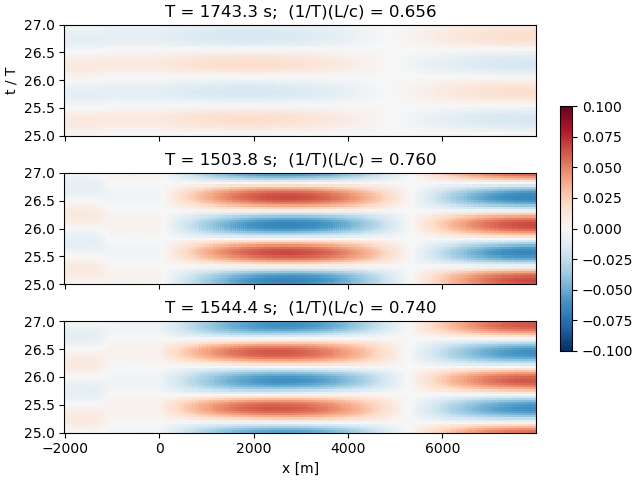

In [514]:

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, layout='constrained')
td = [sealevel, sealevel1, sealevel2]
periods = [period, period1, period2]
for nn in range(3):
    pc = axs[nn].pcolormesh(x, time / periods[nn], td[nn], clim=(-0.1, 0.1), cmap='RdBu_r')
    axs[nn].set_ylim([25, 27])
    axs[nn].set_title(f'T = {periods[nn]:1.1f} s;  (1/T)(L/c) = {L/c/periods[nn]:1.3f}')

fig.colorbar(pc, ax=axs, shrink=0.6)
axs[-1].set_xlabel('x [m]')
axs[0].set_ylabel('t / T')


So we see here that the response is amplified by about a factor of 10 when the forcing period is "resonant".  However, the response does not go to infinity because the ocean forcing is not perfectly clamped like the analytical signal is.  You can also see that the phase shift is not 180 degrees at the head of the inlet as predicted, though there is a distinct phase shift.  Again, this is because of the organic forcing in the ocean instead of a perfectly clamped oscillator - the strong response in the inlet is large enough to affect the "ocean".  We could probably reduce this by increasing the size of the reservoir.  

## Q2: Ray tracing

Lets shoot some rays over shoaling topography.  The topography is as pictured below, and has a headland pushing out into a basin with uniform topography.  

The code below makes the topography, plots it, and then sets up arrays `kx`, `ky`, and `xs`, `ys` to store the ray tracing in.  

We then start the ray tracing with 10 rays that are parallel in deep water and pointing with a 20 degree angle of incidence to the x axis.  You may choose other starting locations if you wish.  If there were no topography, these rays would travel towards the upper-right of the plot in straight lines perpendicular to the thick blue line. 

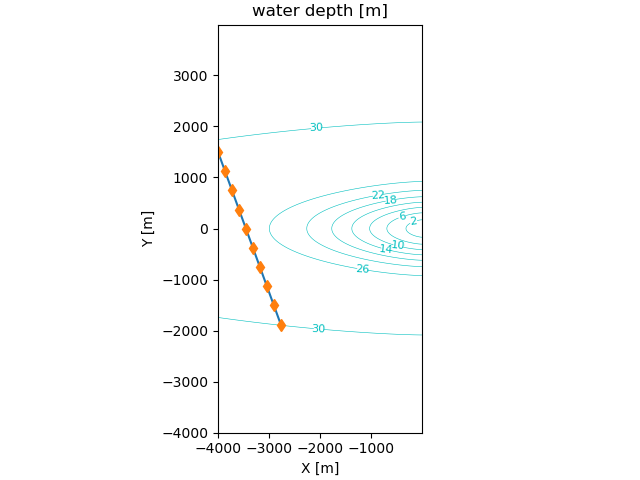

In [531]:
x = np.arange(-4_000, 0, 2)
y = np.arange(-4_000, 4_000, 1)
X, Y = np.meshgrid(x, y, indexing='ij')
#h = -X / 200
#h[X<-3600] = h[0, 300]
h = 30.001 - 30 * np.exp( - ((np.abs(X)*3)**(1.5) + Y**2) / 650**2)

# plot topography

fig, ax = plt.subplots(layout='constrained')
#ax.plot(xs.T, ys.T)
ax.set_aspect(1)
#ax.plot(xs[:, ::100], ys[:, ::100], linewidth=0.5, color='0.5');
cb = ax.contour(x, y, h.T, levels=np.arange(2, 34, 4), colors='c', zorder=-1, linewidths=0.4)
ax.clabel(cb, fontsize=8)
ax.set(ylabel='Y [m]', xlabel='X [m]', title='water depth [m]')

angle = 20 * np.pi / 180

kx = np.zeros((10, len(t)))
ky = np.zeros((10, len(t)))
xs = np.zeros((10, len(t)))
ys = np.zeros((10, len(t)))

xs[0, 0] = x[0]
ys[0, 0] = y[-100]

for ii in range(1, 10):
    xs[ii, 0] = xs[ii-1, 0] + 400 * np.sin(angle)
    ys[ii, 0] = ys[ii-1, 0] - 400 * np.cos(angle)

ys = ys - 2_400

# plot the start of the rays
ax.plot(xs[:, 0], ys[:, 0])
ax.plot(xs[:, 0], ys[:, 0], 'd')



We will also need to set up some inerpolation for h and $dh/dx$ and $dh/dy$, so set these up here.  

In [540]:
# set up the interpolants.  
from scipy.interpolate import RegularGridInterpolator
dh_dx, dh_dy = np.gradient(h, x, y, edge_order=2)

interp_linear = RegularGridInterpolator((x, y), h, method='linear')
interp_hx = RegularGridInterpolator((x, y), dh_dx, method='linear')
interp_hy = RegularGridInterpolator((x, y), dh_dy, method='linear')

# example use:
depth = interp_linear((-100, -800))
print(f'depth at x=-100, y=-800: {depth:1.2f} m')


depth at x=-100, y=-800: 23.49 m


### Q2.1 

For each ray, numerically time step it into the shallow water using the mathematics described in class.  Plot the resulting ray paths, and comment on where energy will be focused and where it will be de-focused.  

Hint: time step forward and store the result of each timestep in `xs`, `ys`.  You probably don't need to, but I stored the result of `kx` and `ky` as well.  

Hint 2: the interpolation set up above will fail if the point your are interpolating to is outside the domain (eg the ray has reached the edge of the domain).  I used a `try`/`except` block, and if it fails it will execute the `except` block.  If that happened I just set h=0 which means the ray won't move.

Hint 3: I found it useful to plot the ray paths and the wave fronts as they move through the fluid.  I did this with a call like `ax.plot(xs[:, ::100], ys[:, ::100], linewidth=0.5, color='0.5');`

In [542]:
g = 9.81
c = np.sqrt(g*h)
om = np.pi * 2 / 10 
k0 = om / c[0, 0]


kx0 = k0 * np.cos(angle)
ky0 = k0 * np.sin(angle)

kx[:, 0] = kx0
ky[:, 0] = ky0

dt = 1 / 10
t = np.arange(0, 1000, dt)

for ind in range(1, len(t)):
    hs = np.zeros(10)
    hx = np.zeros(10)
    hy = np.zeros(10)
    for ii in range(10):
        try:
            point = np.array([xs[ii, ind-1], ys[ii, ind-1]])
            #print('point', point)
            hs[ii] = interp_linear(point)
            hx[ii] = interp_hx(point)
            hy[ii] = interp_hy(point)
        except:
            hs[ii] = 0
            hx[ii] = 0
            hy[ii] = 0
    if np.all(hs==0):
        break
            
    #print(hs)
    xs[:, ind] = xs[:, ind-1] + dt * np.sqrt(g*hs)*kx[:, ind-1] / np.sqrt(kx[:, ind-1]**2 + ky[:, ind-1]**2 )
    ys[:, ind] = ys[:, ind-1] + dt * np.sqrt(g*hs)*ky[:, ind-1] / np.sqrt(kx[:, ind-1]**2 + ky[:, ind-1]**2 )


    kx[:, ind] = kx[:, ind-1] + dt * (-0.5 * om / hs) * hx
    ky[:, ind] = ky[:, ind-1]  + dt * (-0.5 * om / hs) * hy

/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/1906946746.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hs[ii] = interp_linear(point)
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/1906946746.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hx[ii] = interp_hx(point)
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/1906946746.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hy[ii] = interp_hy(point)


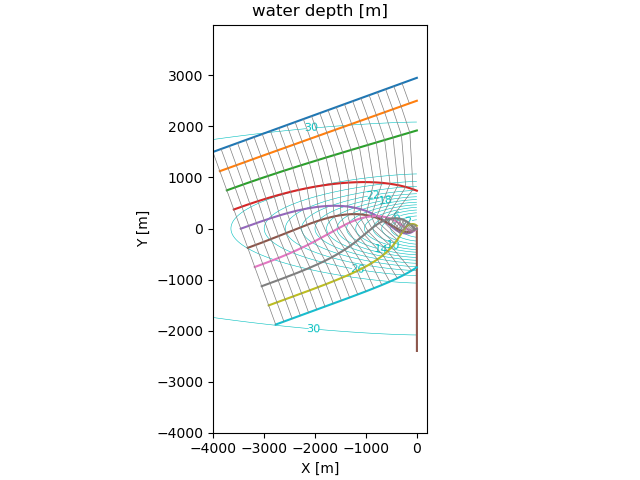

In [543]:
fig, ax = plt.subplots(layout='constrained')
ax.set_aspect(1)
cb = ax.contour(x, y, h.T, levels=np.arange(2, 34, 4), colors='c', zorder=-1, linewidths=0.4)
ax.clabel(cb, fontsize=8)
ax.set(ylabel='Y [m]', xlabel='X [m]', title='water depth [m]')

ax.plot(xs.T, ys.T)
ax.set_aspect(1)
ax.plot(xs[:, ::100], ys[:, ::100], linewidth=0.5, color='0.5');
ax.contour(x, y, h.T, colors='c', zorder=-1, linewidths=0.4)

So energy clearly focused on the underwater point, with rays bending towards the shallow water and converging, which will eventually lead to breaking.  The flanks of the point have weaker waves; eg the green and red characteristics above diverge, spreading wave energy out.  Given the angle, the convergence is stronger on the south side of the point.

### Q2.2 zero incidence?

Rerun the code above, but with the incoming wavecrests parallell to the shore, and the rays pointing directly onshore.  Do you still get convergence at the underwater point?

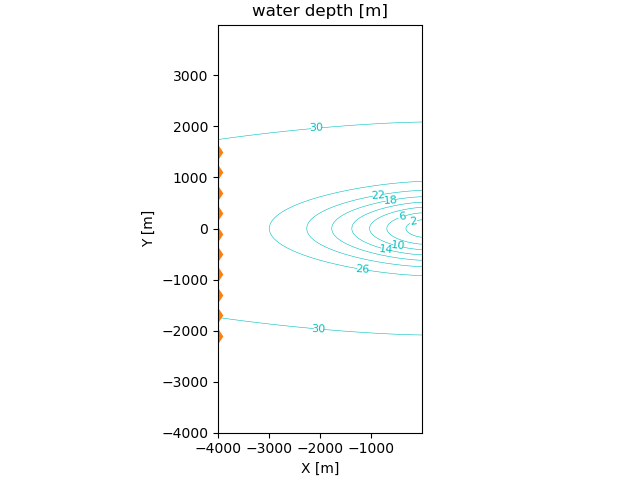

In [545]:

fig, ax = plt.subplots(layout='constrained')
#ax.plot(xs.T, ys.T)
ax.set_aspect(1)
#ax.plot(xs[:, ::100], ys[:, ::100], linewidth=0.5, color='0.5');
cb = ax.contour(x, y, h.T, levels=np.arange(2, 34, 4), colors='c', zorder=-1, linewidths=0.4)
ax.clabel(cb, fontsize=8)
ax.set(ylabel='Y [m]', xlabel='X [m]', title='water depth [m]')

angle = 0 * np.pi / 180

kx = np.zeros((10, len(t)))
ky = np.zeros((10, len(t)))
xs = np.zeros((10, len(t)))
ys = np.zeros((10, len(t)))

xs[0, 0] = x[0]
ys[0, 0] = y[-100]

for ii in range(1, 10):
    xs[ii, 0] = xs[ii-1, 0] + 400 * np.sin(angle)
    ys[ii, 0] = ys[ii-1, 0] - 400 * np.cos(angle)

ys = ys - 2_400

# plot the start of the rays
ax.plot(xs[:, 0], ys[:, 0])
ax.plot(xs[:, 0], ys[:, 0], 'd')

/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/1052752849.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hs[ii] = interp_linear(point)
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/1052752849.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hx[ii] = interp_hx(point)
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/1052752849.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hy[ii] = interp_hy(point)


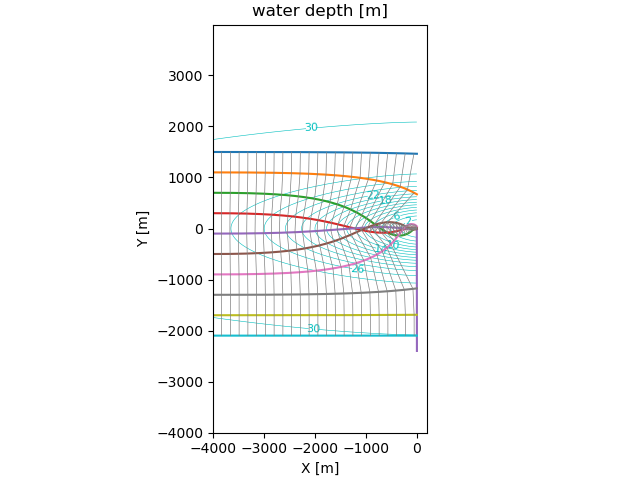

In [547]:
g = 9.81
c = np.sqrt(g*h)
om = np.pi * 2 / 10 
k0 = om / c[0, 0]


kx0 = k0 * np.cos(angle)
ky0 = k0 * np.sin(angle)

kx[:, 0] = kx0
ky[:, 0] = ky0

dt = 1 / 10
t = np.arange(0, 1000, dt)

for ind in range(1, len(t)):
    hs = np.zeros(10)
    hx = np.zeros(10)
    hy = np.zeros(10)
    for ii in range(10):
        try:
            point = np.array([xs[ii, ind-1], ys[ii, ind-1]])
            #print('point', point)
            hs[ii] = interp_linear(point)
            hx[ii] = interp_hx(point)
            hy[ii] = interp_hy(point)
        except:
            # the above fails if "point" is outside the domain
            hs[ii] = 0
            hx[ii] = 0
            hy[ii] = 0
    if np.all(hs==0):
        break
            
    xs[:, ind] = xs[:, ind-1] + dt * np.sqrt(g*hs)*kx[:, ind-1] / np.sqrt(kx[:, ind-1]**2 + ky[:, ind-1]**2 )
    ys[:, ind] = ys[:, ind-1] + dt * np.sqrt(g*hs)*ky[:, ind-1] / np.sqrt(kx[:, ind-1]**2 + ky[:, ind-1]**2 )

    kx[:, ind] = kx[:, ind-1] + dt * (-0.5 * om / hs) * hx
    ky[:, ind] = ky[:, ind-1]  + dt * (-0.5 * om / hs) * hy
fig, ax = plt.subplots(layout='constrained')
ax.set_aspect(1)
cb = ax.contour(x, y, h.T, levels=np.arange(2, 34, 4), colors='c', zorder=-1, linewidths=0.4)
ax.clabel(cb, fontsize=8)
ax.set(ylabel='Y [m]', xlabel='X [m]', title='water depth [m]')

ax.plot(xs.T, ys.T)
ax.set_aspect(1)
ax.plot(xs[:, ::100], ys[:, ::100], linewidth=0.5, color='0.5');
ax.contour(x, y, h.T, colors='c', zorder=-1, linewidths=0.4)

Exactly the same thing happens, except now it is symmetric in Y.  

## Q3: Dispersive and non-dispersive waves

### Q3.1 

Create a spatially Gaussian packet of waves $\eta(x, t)$ using a modest number of wavelengths added together with a Gaussian taper in value about a central wavenumber $k_0$.  Make the central wavenumber $2\pi/400\ \mathrm{m}$, and have a reasonably tight-in-space packet by using a good spread of wavelengths around 400 m.    

Propagate this packet forward in time assuming $h=10\ \mathrm{m}$, $h=50\ \mathrm{m}$, and $h=1000\ \mathrm{m}$, using the full dispersion relation, plot as Hovmoller diagrams, and comment on the character of the wave packets and dispersion.  Include on your plot a line representing the phase speed of a wave at the central wavenumber, and the group speed.  

Hint: Make sure you have enough space and time for the waves to propogate a finite distance!


16 0.01619166880350168


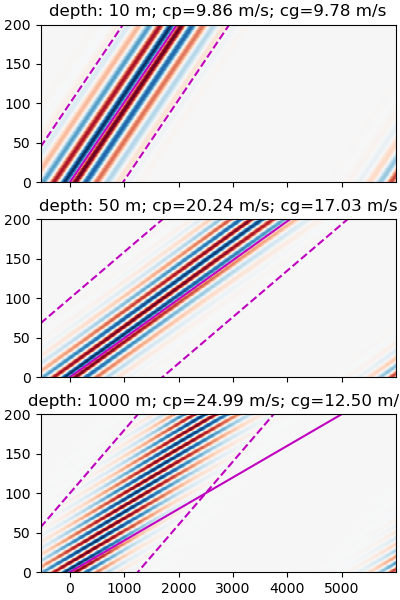

In [679]:
k = np.linspace(1/20000, 1/100, 64) * np.pi * 2
k0 = 2 * np.pi / 400
ind = np.argmax(k > k0) 
print(ind, k[ind])
amp = np.exp(-(k-np.pi*2/400)**2 / (1/100_000))

#fig, ax = plt.subplots()
#ax.plot(k, amp)

x = np.arange(-90*6, 1000*6)

X, K = np.meshgrid(x, k)
hs = [10, 50, 1000]
fig, axs = plt.subplots(3, 1, figsize=(4, 6), layout='constrained', sharex=True, 
                        sharey=True)

for ii in range(3):
    ax = axs[ii]
    ntimes = 400
    dt = 1
    etas = np.zeros((ntimes, len(x)))
    h = hs[ii]
    omega = np.sqrt(g*K * np.tanh(K*h))
    
    for time in range(ntimes):
        t = time * dt
        
        eta = amp[:, np.newaxis]*np.sin(K*X - omega*t)
        etas[time, :] = np.sum(eta, axis=0)
    cp = np.sqrt(g/k0*np.tanh(k0*h))
    ax.plot(x, x/cp, 'm')
    cg = 0.5*cp*(1+ 2*k0*h/np.sinh(2*k0*h))
    ax.plot(x, x/cg+100, 'm--')
    ax.plot(x, x/cg-100, 'm--')
    ax.set(title=f'depth: {hs[ii]} m; cp={cp:1.2f} m/s; cg={cg:1.2f} m/s', ylim=[0, 200])
    ax.pcolormesh(x, np.arange(ntimes)*dt, etas, cmap='RdBu_r')


So the 10-m depth the phase and group speeds are the same, and the packet stays relatively together.  As the water gets deeper, clearly the phase speed is faster than the group speed.  The packets also get wider with time, indicating that there has been dispersion.   

### Q3.2  plot dispersion relationship and wave speeds

Assume the water is 20 m deep, plot the dispersion relationship, phase speed, and group speeds as a function of $k$, and indicate the deep and shallow water approximations.   What values of $kh$ would you say are acceptably close to each approximation?


<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\,'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\,'
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/331275020.py:13: SyntaxWarning: invalid escape sequence '\o'
  axs[0].set_ylabel('$\omega \ \mathrm{[rad\,s^{-1}]}$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_76541/331275020.py:27: SyntaxWarning: invalid escape sequence '\,'
  axs[2].set_xlabel('$k\, h$')


Text(0, 0.5, '$c_g / \\left(gh\\right)^{1/2}$')

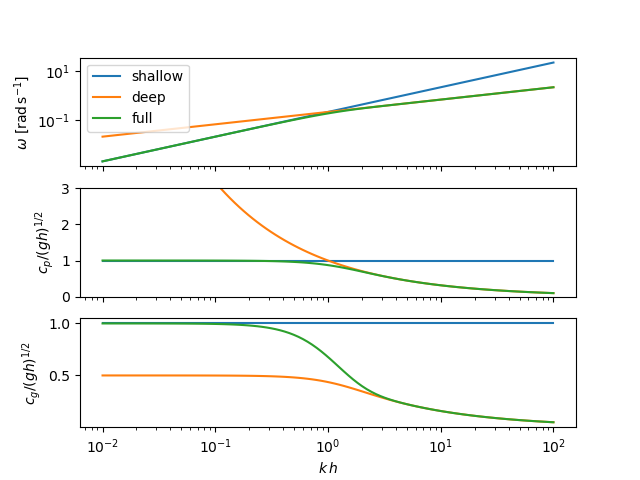

In [677]:
h = 200
k = np.logspace(-2, 2,100) / h
om = np.sqrt(g*k*np.tanh(k*h))
cp = om / k
cg = cp / 2 * (1 + 2*k*h/np.sinh(2*k*h))
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].plot(k * h , np.sqrt(g*h)*k, label='shallow')
axs[0].plot(k*h, np.sqrt(g*k), label='deep')
axs[0].plot(k * h , om, label='full')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylabel('$\omega \ \mathrm{[rad\,s^{-1}]}$')
axs[0].legend()

axs[1].plot(k * h , 1 + 0*k )
axs[1].plot(k*h, np.sqrt(g*k) / k / np.sqrt(g*h))
axs[1].plot(k * h , om / k / np.sqrt(g*h))
axs[1].set_ylim([0, 3])
axs[1].set_xscale('log')
axs[1].set_ylabel(r'$c_p / \left(gh\right)^{1/2}$')

axs[2].plot(k * h , np.sqrt(g*h) / np.sqrt(g*h) + 0*k )
axs[2].plot(k*h, cp / 2 / np.sqrt(g*h))
axs[2].plot(k * h , cg / np.sqrt(g*h))
axs[2].set_xscale('log')
axs[2].set_xlabel('$k\, h$')
axs[2].set_ylabel(r'$c_g / \left(gh\right)^{1/2}$')


Clearly the approximations are quite good once $kh<0.1$ or $kh>3$ or so.  Of course, how good the approximation you need depends on the problem you are considering. 